In [38]:
import sys, os
mainpath = os.path.abspath(os.path.dirname(sys.argv[0]))
sys.path.append(mainpath)

import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline 

In [39]:
face_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_frontalface_default.xml'))
eye_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_eye.xml'))
mouth_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_mcs_mouth.xml'))
nose_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_mcs_nose.xml'))
profileface_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_profileface.xml'))
left_ear_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_mcs_leftear.xml'))
right_ear_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_mcs_rightear.xml'))



In [34]:
def show_webcam(img):

    img2 = cv2.resize(img, (640, 360))
    gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    if len(faces) == 0:
        faces = profileface_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img2,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img2[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        mouth = mouth_cascade.detectMultiScale(roi_gray)
        nose = nose_cascade.detectMultiScale(roi_gray)
        right_ear_cascade.detectMultiScale(roi_gray)
        left_ear_cascade.detectMultiScale(roi_gray)

        for (ex,ey,ew,eh) in eyes:
            center = (int(ex + ew/2), int(ey + eh/2))
            # radius = int(min(ew, eh)/2)
            radius = 5
            cv2.circle(roi_color, center, radius, (0,255,0), 2)

        for (mx,my,mw,mh) in mouth:
            if y + my > y + h/2:
                center = (int(mx + mw/2), int(my + mh/2))
                # radius = int(min(mw, mh)/2)
                radius = 5
                cv2.circle(roi_color, center, radius, (0,0,255), 2)

        for (nx,ny,nw,nh) in nose:
            center = (int(nx + nw/2), int(ny + nh/2))
            # radius = int(min(nw, nh)/2)
            radius = 5
            cv2.circle(roi_color, center, radius, (255,255,0), 2)

        for (rex,rey,rew,reh) in right_ear_cascade.detectMultiScale(roi_gray):
            if x + rex > x + w/2:
                center = (int(rex + rew/2), int(rey + reh/2))
                # radius = int(min(rew, reh)/2)
                radius = 5
                cv2.circle(roi_color, center, radius, (255,0,255), 2)
    
        for (lex,ley,lew,leh) in left_ear_cascade.detectMultiScale(roi_gray):
            if x + lex < x + w/2:
                center = (int(lex + lew/2), int(ley + leh/2))
                # radius = int(min(lew, leh)/2)
                radius = 5
                cv2.circle(roi_color, center, radius, (0,255,255), 2)
        
    cv2.imshow('Faces', img2)
      # Wait for a key press indefinitely
    while True:
        key = cv2.waitKey(0) & 0xFF
        if key == 27:  # ESC key
            break
    
    cv2.destroyAllWindows()

In [35]:
heads = {}
i = 0

# folder_path = "AFLW2000-3D/AFLW2000/"
folder_path = os.getcwd()
jpg_files = glob.glob(os.path.join(folder_path, "*.jpg"))
print(f"Found {len(jpg_files)} .jpg files in {folder_path}")

for image_path in jpg_files:
    image_name = os.path.basename(image_path)
    
    image = cv2.imread(os.path.join(folder_path, image_name))
    
    sobel_x = cv2.Sobel(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), cv2.CV_64F, 1, 0, ksize=3) # Horizontal
    sobel_y =  cv2.Sobel(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), cv2.CV_64F, 0, 1, ksize=3) # Vertical
    
    heads[image_name] = {
        "im_rgb": image,
        "im_bgr": cv2.cvtColor(image, cv2.COLOR_RGB2BGR),
        "im_gray": cv2.cvtColor(image, cv2.COLOR_RGB2GRAY),
        "im_gray_gaussian": cv2.GaussianBlur(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), (5, 5), 0),
        "im_sobel_x": sobel_x,  # Horizontal
        "im_sobel_y": sobel_y,  # Vertical
        "im_sobel_mag": cv2.normalize(np.sqrt(sobel_x**2 + sobel_y**2), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    }
    
    # output_path = f"{image_name[0:-4]}_head_pose.jpg"  # Save annotated image for each
    print(f"\nProcessing {image_name}...")
    # result = GetHeadPose(image_path, output_path)
    # print("Head Pose Euler Angles:", result['angles'])
    # print("Rotation Matrix (Camera to Head Frame):\n", result['camera_to_head_rotation'])
    i = i + 1
    # if i >= 25:
    #     break

Found 41 .jpg files in c:\Users\jesti\OneDrive\Documents\USYD\2025_S2C_AMME5710\Major Project\AMME5710_Major\src

Processing emily1.jpg...

Processing emily10.jpg...

Processing emily2.jpg...

Processing emily3.jpg...

Processing emily4.jpg...

Processing emily5.jpg...

Processing emily6.jpg...

Processing emily7.jpg...

Processing emily8.jpg...

Processing emily9.jpg...

Processing image00002_head_pose.jpg...

Processing image00002_head_pose_head_pose.jpg...

Processing image00004_head_pose.jpg...

Processing image00004_head_pose_head_pose.jpg...

Processing image00006_head_pose.jpg...

Processing image00006_head_pose_head_pose.jpg...

Processing image00008_head_pose.jpg...

Processing image00008_head_pose_head_pose.jpg...

Processing T2_seq-123456789_dist-1.09_rgb_1.jpg...

Processing T2_seq-123456789_dist-1.09_rgb_1_head_pose.jpg...

Processing T2_seq-123456789_dist-1.09_rgb_2.jpg...

Processing T2_seq-123456789_dist-1.09_rgb_2_head_pose.jpg...

Processing T2_seq-123456789_dist-1.09

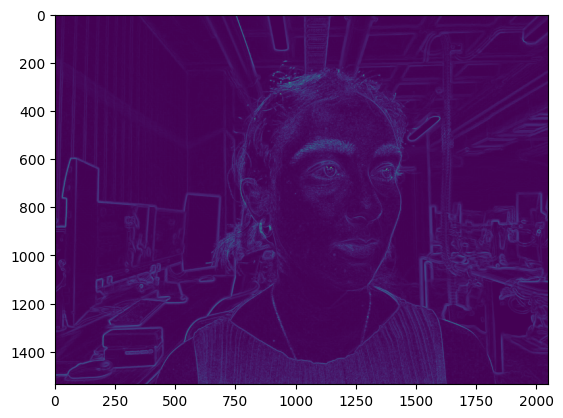

In [36]:
plt.imshow(heads["emily1.jpg"]["im_sobel_mag"])

In [40]:
show_webcam(heads["emily1.jpg"]["im_rgb"])

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'
